## Solution

In [1]:
import requests

# Realizamos la llamada con get y, transformamos en json la salida
req_js = requests.get("https://swapi.dev/api/").json()

# La mostramos por pantalla
print(req_js)

{'people': 'https://swapi.dev/api/people/', 'planets': 'https://swapi.dev/api/planets/', 'films': 'https://swapi.dev/api/films/', 'species': 'https://swapi.dev/api/species/', 'vehicles': 'https://swapi.dev/api/vehicles/', 'starships': 'https://swapi.dev/api/starships/'}


In [2]:
# # Hacemos una llamada a la API en el servicio web de People para obtener el conteo de personajes de Star Wars
req_people = requests.get("https://swapi.dev/api/people/").json()
req_people

# Observamos que "count" existe como campo clave
req_people.keys()

# Mostramos el número de personajes
print(req_people["count"])

# Nos lo guardamos en una nueva variable
n_people = req_people["count"]

# # Ya tenemos los 82 personajes, ahora, simplemente vamos iterando a través de un bucle
# #  sobre el nº de personajes
# for personaje in range(n_people+1): # +1 Para que no vaya hasta n-1
#     print("\tLlamando a la URL: ","https://swapi.dev/api/people/"+str(personaje))
#     print(requests.get("https://swapi.dev/api/people/"+str(personaje)).json())

82


In [3]:
import requests

# Resulta que si el personaje no existe, nos devolverá el campo clave "detail"
#  Asi que, si se encuentra dicho campo clave, no hacemos nada y pasamos al siguiente
#  Para guardarlo en una lista

# Todos los personajes
all_people = []

for personaje in range(n_people+1): # +1 Para que no vaya hasta n-1
    
    # Guardamos cada personaje como diccionario
    results = requests.get("https://swapi.dev/api/people/"+str(personaje)).json()
    
    if "detail" in results.keys():
        pass # No hacemos nada, no tiene resultados
    else:
        # Guardamos solo los campos clave solicitados de cada personaje
        current_people = [
            results["name"],
            results["height"],
            results["mass"],
            results["hair_color"],
            results["skin_color"],
            results["eye_color"],
            results["birth_year"],
            results["gender"]
        ]
        
        # Cuando terminemos de guardar resultados, lo pasamos a una lista
        #  con la información de todos los personajes
        all_people.append(current_people)

In [4]:
print("Primeros 3 personajes\n", all_people[:3])
print("Número total de personajes ingestados: ", len(all_people))

Primeros 3 personajes
 [['Luke Skywalker', '172', '77', 'blond', 'fair', 'blue', '19BBY', 'male'], ['C-3PO', '167', '75', 'n/a', 'gold', 'yellow', '112BBY', 'n/a'], ['R2-D2', '96', '32', 'n/a', 'white, blue', 'red', '33BBY', 'n/a']]
Número total de personajes ingestados:  81


In [5]:
# Lo guardamos como Pandas Dataframe
import pandas as pd

columnas = ["name", "height", "mass", "hair_color", 
            "skin_color", "eye_color", "birth_year", "gender"]

df_stw = pd.DataFrame(all_people, 
                      columns=columnas)

df_stw # Habría que revisar posteriormente los valores nulos.

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender
0,Luke Skywalker,172,77,blond,fair,blue,19BBY,male
1,C-3PO,167,75,n/a,gold,yellow,112BBY,n/a
2,R2-D2,96,32,n/a,"white, blue",red,33BBY,n/a
3,Darth Vader,202,136,none,white,yellow,41.9BBY,male
4,Leia Organa,150,49,brown,light,brown,19BBY,female
...,...,...,...,...,...,...,...,...
76,Shaak Ti,178,57,none,"red, blue, white",black,unknown,female
77,Grievous,216,159,none,"brown, white","green, yellow",unknown,male
78,Tarfful,234,136,brown,brown,blue,unknown,male
79,Raymus Antilles,188,79,brown,light,brown,unknown,male


In [6]:
# Filtramos nulos
df_stw = df_stw[df_stw.mass != "unknown"]
# Eliminamos la , que indica separador de miles
df_stw.loc[:,"mass"] = pd.to_numeric(df_stw.mass.apply(lambda x: x.replace(",", "")))

df_stw.loc[:,"height"] = pd.to_numeric(df_stw["height"])

C:\Users\jmmor\AppData\Local\Temp\ipykernel_16168\2983376456.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stw.loc[:,"mass"] = pd.to_numeric(df_stw.mass.apply(lambda x: x.replace(",", "")))
C:\Users\jmmor\AppData\Local\Temp\ipykernel_16168\2983376456.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_stw.loc[:,"mass"] = pd.to_numeric(df_stw.mass.apply(lambda x: x.replace(",", "")))
C:\Users\jmmor\AppData\Local\Temp\ipykernel_16168\2983376456.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [7]:
df_stw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 0 to 80
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        58 non-null     object 
 1   height      58 non-null     int64  
 2   mass        58 non-null     float64
 3   hair_color  58 non-null     object 
 4   skin_color  58 non-null     object 
 5   eye_color   58 non-null     object 
 6   birth_year  58 non-null     object 
 7   gender      58 non-null     object 
dtypes: float64(1), int64(1), object(6)
memory usage: 4.1+ KB


In [8]:
df_stw.groupby(["gender"]).mean(numeric_only=True)["mass"]

gender
female             54.020000
hermaphrodite    1358.000000
male               81.027907
n/a                46.333333
none              140.000000
Name: mass, dtype: float64

In [9]:
import matplotlib.pyplot as plt

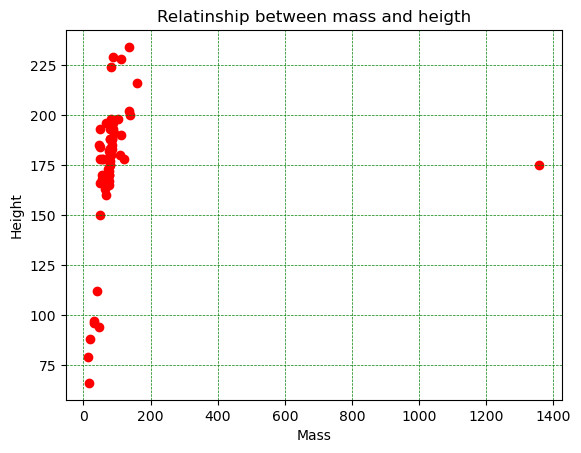

In [10]:
plt.scatter(df_stw.mass, df_stw.height, color = "red")
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.title("Relatinship between mass and heigth")
plt.xlabel("Mass")
plt.ylabel("Height")
plt.show()

In [11]:
groups = df_stw.groupby(["eye_color"]).mean(numeric_only=True)["height"]
groups

eye_color
black            187.333333
blue             186.083333
blue-gray        182.000000
brown            165.307692
green, yellow    216.000000
hazel            174.000000
orange           175.000000
red              154.800000
unknown          136.000000
white            178.000000
yellow           172.777778
Name: height, dtype: float64

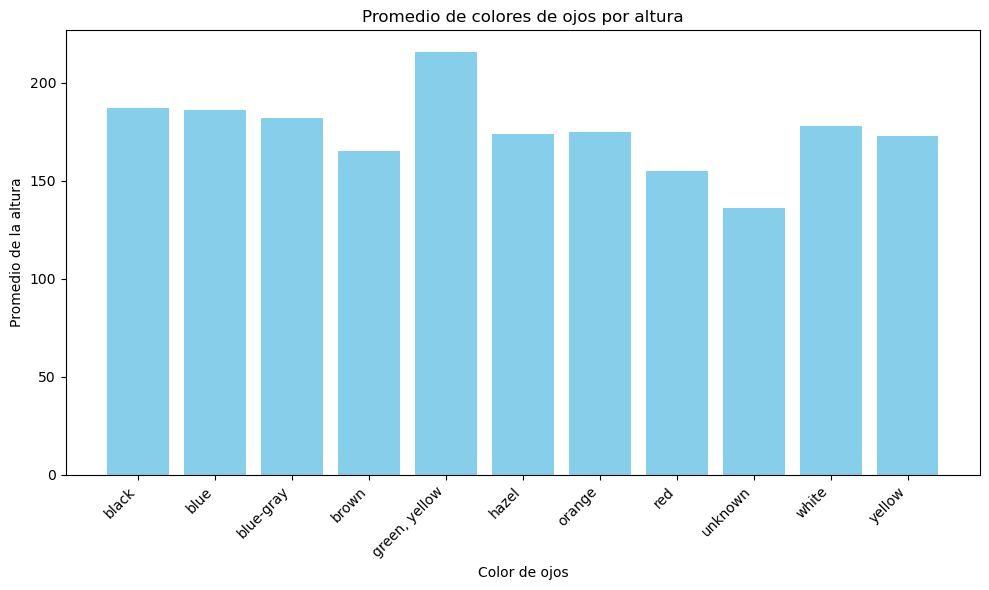

In [13]:
plt.figure(figsize=(10, 6))
plt.bar(groups.keys(), groups.values, color='skyblue')
plt.xlabel('Color de ojos')
plt.ylabel('Promedio de la altura')
plt.title('Promedio de colores de ojos por altura')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()